In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.metrics import pairwise_distances_argmin


set1 = 'C:/Users/robba/OneDrive/Skrivbord/Programmering/Python/Addiva/smhi/smhi_vasteras.csv'


df = pd.read_csv(set1, sep= ';', header = 0)

In [26]:
df.head()

,Datum,Tid (UTC),Lufttemperatur,Kvalitet
0,1858-12-01,07:00:00,0.0,G
1,1858-12-01,13:00:00,1.0,G
2,1858-12-01,20:00:00,2.0,G
3,1858-12-02,07:00:00,1.0,G
4,1858-12-02,13:00:00,1.8,G


In [27]:
#Ser över de olika spann som finns i datasettet
for col in df.columns: 
    print(f'{col} har ett spann mellan {min(df[col])} och {max(df[col])}')

Datum har ett spann mellan 1858-12-01 och 2022-07-01
Tid (UTC) har ett spann mellan 06:00:00 och 20:00:00
Lufttemperatur har ett spann mellan -36.4 och 34.2
Kvalitet har ett spann mellan G och Y


In [28]:
#Räknar antal NaN i df datasetet
missing_data1 = 0

for i in df:
    missing_data1 = missing_data1 + df[i].isna().sum() 
missing_data1

0

In [29]:
s = df.loc[df['Kvalitet'] == "Y"]
s.head(10)

,Datum,Tid (UTC),Lufttemperatur,Kvalitet
119864,2010-09-19,06:00:00,7.9,Y
120595,2011-09-19,18:00:00,13.7,Y
121733,2013-04-18,06:00:00,5.6,Y
122483,2014-05-06,06:00:00,5.0,Y
123261,2015-05-30,06:00:00,11.2,Y
124284,2016-10-22,18:00:00,3.0,Y


In [30]:
s.shape

(6, 4)

In [31]:
mask = (df['Datum'] > '2015-07-01') & (df['Datum'] <= '2022-07-01')
new_df = df.loc[mask]
print(df.loc[mask])

             Datum Tid (UTC)  Lufttemperatur Kvalitet
123327  2015-07-02  06:00:00            21.5        G
123328  2015-07-02  18:00:00            25.5        G
123329  2015-07-03  06:00:00            22.2        G
123330  2015-07-03  18:00:00            23.0        G
123331  2015-07-04  06:00:00            23.2        G
...            ...       ...             ...      ...
128435  2022-06-29  06:00:00            18.0        G
128436  2022-06-29  18:00:00            21.5        G
128437  2022-06-30  06:00:00            21.1        G
128438  2022-06-30  18:00:00            24.1        G
128439  2022-07-01  06:00:00            19.2        G

[5113 rows x 4 columns]


In [32]:
new_df.head()

,Datum,Tid (UTC),Lufttemperatur,Kvalitet
123327,2015-07-02,06:00:00,21.5,G
123328,2015-07-02,18:00:00,25.5,G
123329,2015-07-03,06:00:00,22.2,G
123330,2015-07-03,18:00:00,23.0,G
123331,2015-07-04,06:00:00,23.2,G


array([[<AxesSubplot:title={'center':'Lufttemperatur'}>]], dtype=object)

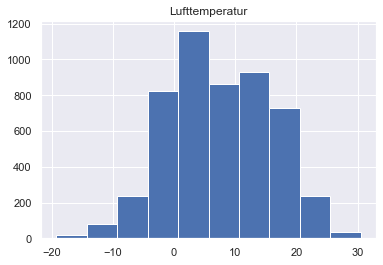

In [33]:
new_df.hist(column='Lufttemperatur')

In [42]:
#Delar upp datan i X och y där X är all data utom quality och y är endast kolumnen quality som vi är facit

X = new_df.values[:,:]
y = new_df.values[:,2]

In [43]:
#Sedan delar jag in datan i träning och testset och sätter ett randomstate för kontinuitet
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [45]:
# clf = RandomForestClassifier(random_state=42)
# clf.fit(X_train, y_train)